In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  # This is added back by InteractiveShellApp.init_path()


254387

In [29]:
data = pd.read_csv('lstm_analysis.csv')
data.fillna(-999,inplace=True)

In [30]:
data.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'abd_difference_y', 'abdomen_girth',
       'actual_DOA', 'actual_DOB', 'apgar_fivemin', 'apgar_onemin',
       'apgar_tenmin', 'baby_type', 'birthheadcircumference', 'birthlength',
       'birthweight', 'central_temp', 'centraltemp', 'conception_type',
       'cont_time', 'creationtime_x', 'creationtime_y', 'currentdateheight',
       'currentdateweight', 'date', 'day', 'day_1', 'day_x', 'day_y', 'dia_bp',
       'dischargeddate', 'dischargestatus', 'dischargestatus_x',
       'dischargestatus_y', 'ecg_resprate', 'entry_timestamp', 'entrydate_x',
       'entrydate_y', 'entrydatetime', 'fio2', 'gender', 'gestation',
       'gestationdaysbylmp', 'gestationweekbylmp', 'heartrate', 'hour',
       'hour_series_x', 'hour_series_y', 'inout_patient_status', 'los', 'map',
       'mean_bp', 'medicationtype', 'medicinename', 'medicineorderdate',
       'minvol', 'mode_of_delivery', 'modificationtime', 'motherage', 'new_ph',
       'numberofdose', 'peep', 'ph'

In [31]:
cols = ['uhid','pulserate', 'ecg_resprate',
       'spo2', 'heartrate', 'mean_bp', 'sys_bp', 'dia_bp',
       'peep', 'pip', 'map', 'tidalvol', 'minvol', 'ti', 'fio2',
       'abd_difference_y',
       'currentdateheight',
       'currentdateweight','dischargestatus', 
       'new_ph', 
       'rbs',  'stool_day_total', 
       'temp', 'total_intake', 'totalparenteralvolume',
       'tpn-tfl', 'typevalue_Antibiotics', 'typevalue_Inotropes',
       'urine','gender', 'birthweight',
       'birthlength', 'birthheadcircumference', 'inout_patient_status',
       'gestationweekbylmp', 'gestationdaysbylmp',
       'baby_type', 'central_temp', 'apgar_onemin', 'apgar_fivemin',
       'apgar_tenmin', 'motherage', 'conception_type', 'mode_of_delivery',
       'steroidname', 'numberofdose', 'gestation']

In [13]:
data.dischargestatus

0          1
1          1
2          1
3          1
4          1
5          1
6          1
7          1
8          1
9          1
10         1
11         1
12         1
13         1
14         1
15         1
16         1
17         1
18         1
19         1
20         1
21         1
22         1
23         1
24         1
25         1
26         1
27         1
28         1
29         1
          ..
1569259    0
1569260    0
1569261    0
1569262    0
1569263    0
1569264    0
1569265    0
1569266    0
1569267    0
1569268    0
1569269    0
1569270    0
1569271    0
1569272    0
1569273    0
1569274    0
1569275    0
1569276    0
1569277    0
1569278    0
1569279    0
1569280    0
1569281    0
1569282    0
1569283    0
1569284    0
1569285    0
1569286    0
1569287    0
1569288    0
Name: dischargestatus, Length: 1569289, dtype: int64

In [32]:
death = data[data['dischargestatus']==1]
dis = data[data['dischargestatus']==0]

In [33]:
n_dis = len(dis)
n_dea = len(death)

414974

array(['RNEH.0000012581', 'RSHI.0000014720', 'RSHI.0000015691',
       'RSHI.0000023451', 'RSHI.0000015178', 'RNEH.0000008375',
       'RNEH.0000011301', 'RSHI.0000012088', 'RSHI.0000017471',
       'RSHI.0000017472', 'RSHI.0000019707', 'RSHI.0000021953',
       'RSHI.0000015211', 'RNEH.0000013713', 'RSHI.0000016373'],
      dtype=object)

61001

357261    2020-03-16 06:01:00.000000
357262    2020-03-16 06:01:00.000000
357263    2020-03-16 06:01:00.000000
357264    2020-03-16 06:01:00.000000
357265    2020-03-16 06:01:00.000000
357266    2020-03-16 06:01:00.000000
357267    2020-03-16 06:01:00.000000
357268    2020-03-16 06:01:00.000000
357269    2020-03-16 06:01:00.000000
357270    2020-03-16 06:01:00.000000
357271    2020-03-16 06:01:00.000000
357272    2020-03-16 06:01:00.000000
357273    2020-03-16 06:01:00.000000
357274    2020-03-16 06:01:00.000000
357275    2020-03-16 06:01:00.000000
357276    2020-03-16 06:01:00.000000
357277    2020-03-16 06:01:00.000000
357278    2020-03-16 06:01:00.000000
357279    2020-03-16 06:01:00.000000
357280    2020-03-16 06:01:00.000000
357281    2020-03-16 06:01:00.000000
357282    2020-03-16 06:01:00.000000
357283    2020-03-16 06:01:00.000000
357284    2020-03-16 06:01:00.000000
357285    2020-03-16 06:01:00.000000
357286    2020-03-16 06:01:00.000000
357287    2020-03-16 06:01:00.000000
3

18

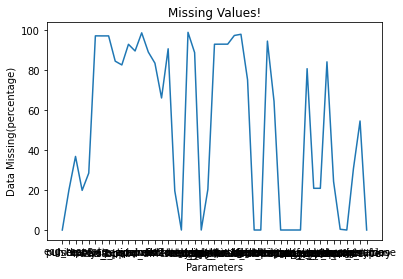

uhid 0 0.0
pulserate 83062 20.016193785634762
ecg_resprate 153013 36.87291251982052
spo2 82467 19.872811308660303
heartrate 118380 28.527088444095295
mean_bp 403794 97.30585530659752
sys_bp 403692 97.2812754534019
dia_bp 403700 97.28320328502508
peep 351129 84.61469875221098
pip 343295 82.72686963520606
map 386271 93.08318111496142
tidalvol 372341 89.72634430108874
minvol 410079 98.82040802556304
ti 370086 89.18293676230317
fio2 346978 83.61439511873033
abd_difference_y 274596 66.17185655004893
currentdateheight 376885 90.8213526630584
currentdateweight 81548 19.651351650946804
dischargestatus 0 0.0
new_ph 411102 99.06692949437796
rbs 368969 88.91376327191584
stool_day_total 0 0.0
temp 84517 20.366818162101723
total_intake 386359 93.10438726281647
totalparenteralvolume 386496 93.13740137936352
tpn-tfl 386496 93.13740137936352
typevalue_Antibiotics 404563 97.49116812137628
typevalue_Inotropes 407090 98.10012193535017
urine 312360 75.27218572729858
gender 0 0.0
birthweight 0 0.0
birthlen

NameError: name 'plt' is not defined

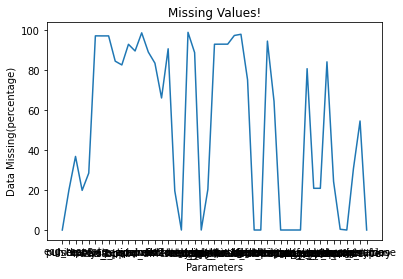

uhid 0 0.0
pulserate 411542 99.26457641386331
ecg_resprate 412275 99.44137716448259
spo2 411542 99.26457641386331
heartrate 411884 99.34706735071431
mean_bp 414320 99.9346343746005


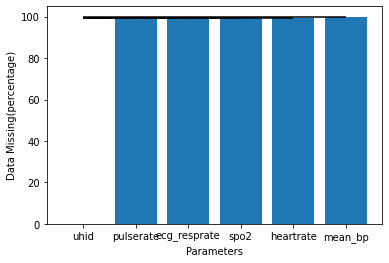

sys_bp 414320 99.9346343746005
dia_bp 414320 99.9346343746005
peep 414571 99.9951759686052
pip 414559 99.99228154976832
map 414591 100.0
tidalvol 414579 99.99710558116313


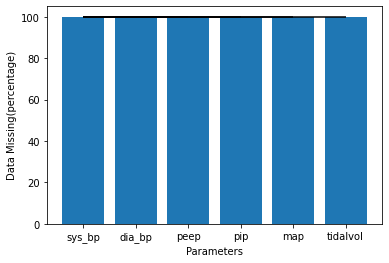

minvol 414571 99.9951759686052
ti 414577 99.99662317802364
fio2 414559 99.99228154976832
abd_difference_y 52657 12.700951057789483
currentdateheight 72103 17.391356782949945
currentdateweight 0 0.0


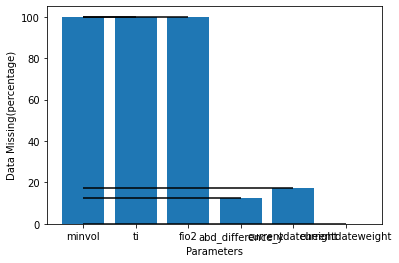

dischargestatus 0 0.0
new_ph 410721 99.06654992510691
rbs 25676 6.193091504639512
stool_day_total 0 0.0
temp 84381 20.352829656215402
total_intake 5623 1.3562764266469847


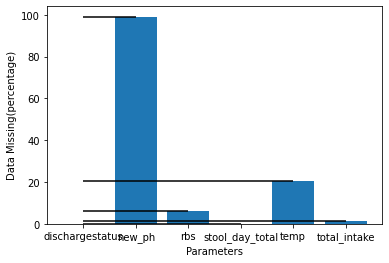

totalparenteralvolume 8265 1.9935309738995783
tpn-tfl 8265 1.9935309738995783
typevalue_Antibiotics 404024 97.45122301255937
typevalue_Inotropes 406730 98.1039144602753
urine 312480 75.37066651229766
gender 0 0.0


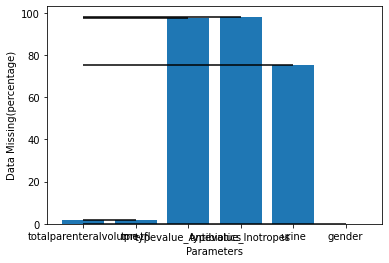

birthweight 0 0.0
birthlength 392504 94.6725809291567
birthheadcircumference 267540 64.53106796819034
inout_patient_status 0 0.0
gestationweekbylmp 0 0.0
gestationdaysbylmp 0 0.0


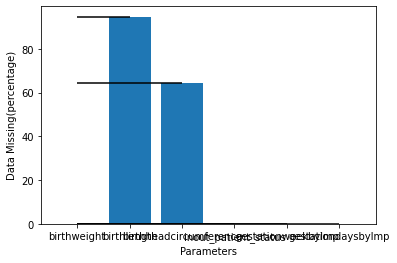

baby_type 0 0.0
central_temp 335369 80.8915292420723
apgar_onemin 86735 20.920618151382932
apgar_fivemin 86735 20.920618151382932
apgar_tenmin 349378 84.2705220325574
motherage 100888 24.33434396791054


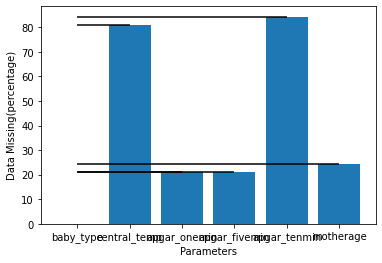

conception_type 0 0.0
mode_of_delivery 0 0.0
steroidname 0 0.0
numberofdose 226481 54.627572716243236
gestation 0 0.0


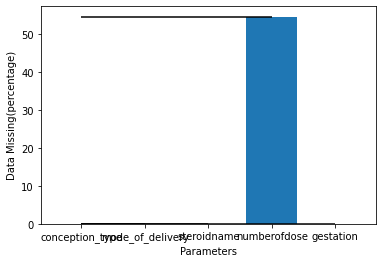

In [36]:
x_series = []
y_series = []
counter = -1
for i in cols:
    counter = counter + 1
        
    if(counter == 6):
        plt.bar(x_series,y_series,align='center') # A bar chart
        plt.xlabel('Parameters')
        plt.ylabel('Data Missing(percentage)')
        for inner in range(len(y_series)):
            plt.hlines(y_series[inner],0,x_series[inner]) # Here you are drawing the horizontal lines
        plt.show()
        x_series = []
        y_series = []
        counter = 0
    x_series.append(i)
    y_series.append(((len(death[death[i]==-999]))/n_dea)*100)
    print(i,(len(death[death[i]==-999])),((len(death[death[i]==-999]))/n_dea)*100)
    
if(counter > 0):
    plt.bar(x_series,y_series,align='center') # A bar chart
    plt.xlabel('Parameters')
    plt.ylabel('Data Missing(percentage)')
    for inner in range(len(y_series)):
        plt.hlines(y_series[inner],0,x_series[inner]) # Here you are drawing the horizontal lines
    plt.show()
    x_series = []
    y_series = []
    counter = 0
  









In [34]:
for i in cols:
    print(i,(len(dis[dis[i]==-999])),((len(dis[dis[i]==-999]))/n_dis)*100)

uhid 0 0.0
pulserate 364212 31.501323323357955
ecg_resprate 595911 51.54136899098756
spo2 362541 31.35679565465585
heartrate 348143 30.111487830614607
mean_bp 1150327 99.4937639467903
sys_bp 1150313 99.4925530626719
dia_bp 1150315 99.49272604611738
peep 1131601 97.8741199467211
pip 1131407 97.85734055250911
map 1102319 95.34146932138594
tidalvol 1143195 98.87690498019339
minvol 1152860 99.71284748049611
ti 1142668 98.8313238423083
fio2 1088302 94.12911484370946
abd_difference_y 15 0.0012973758411320038
currentdateheight 0 0.0
currentdateweight 0 0.0
dischargestatus 0 0.0
new_ph 1155159 99.91169195108029
rbs 24856 2.149838260478472
stool_day_total 0 0.0
temp 197912 17.117749831341143
total_intake 4225 0.36542752858551436
totalparenteralvolume 5006 0.4329775640471207
tpn-tfl 5006 0.4329775640471207
typevalue_Antibiotics 1141629 98.74145894237921
typevalue_Inotropes 1156180 100.0
urine 804052 69.54384265425799
gender 0 0.0
birthweight 0 0.0
birthlength 907367 78.47973498936152
birthheadci